In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('owid-covid-data.csv')

In [5]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73991,ZWE,Africa,Zimbabwe,2021-03-06,36260.0,12.0,28.857,1485.0,1.0,3.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73992,ZWE,Africa,Zimbabwe,2021-03-07,36271.0,11.0,26.000,1485.0,0.0,3.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73993,ZWE,Africa,Zimbabwe,2021-03-08,36289.0,18.0,24.857,1487.0,2.0,2.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73994,ZWE,Africa,Zimbabwe,2021-03-09,36321.0,32.0,24.714,1489.0,2.0,2.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [6]:
df.shape

(73996, 59)

In [7]:
print(df['location'].value_counts())

Argentina           435
Mexico              435
Thailand            432
Taiwan              420
South Korea         415
                   ... 
Falkland Islands     16
Montserrat           16
Macao                11
Northern Cyprus       9
Saint Helena          1
Name: location, Length: 215, dtype: int64


## Data Cleansing

In [9]:
df_ina=df.loc[df['location']=='Indonesia']
df_ina=df_ina.reset_index(drop=True)

In [10]:
df_ina.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,IDN,Asia,Indonesia,2020-03-02,2.0,2.0,NaN,NaN,NaN,NaN,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
1,IDN,Asia,Indonesia,2020-03-03,2.0,0.0,NaN,NaN,NaN,NaN,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
2,IDN,Asia,Indonesia,2020-03-04,2.0,0.0,NaN,NaN,NaN,NaN,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
3,IDN,Asia,Indonesia,2020-03-05,2.0,0.0,NaN,NaN,NaN,NaN,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
4,IDN,Asia,Indonesia,2020-03-06,4.0,2.0,NaN,NaN,NaN,NaN,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718


In [11]:
df_ina.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
369,IDN,Asia,Indonesia,2021-03-06,1373836.0,5767.0,6394.571,37154.0,128.0,167.571,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
370,IDN,Asia,Indonesia,2021-03-07,1379662.0,5826.0,6432.571,37266.0,112.0,157.143,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
371,IDN,Asia,Indonesia,2021-03-08,1386556.0,6894.0,6463.143,37547.0,281.0,174.571,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
372,IDN,Asia,Indonesia,2021-03-09,1392945.0,6389.0,6559.857,37757.0,210.0,177.000,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
373,IDN,Asia,Indonesia,2021-03-10,1398578.0,5633.0,6392.000,37932.0,175.0,173.000,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718


In [12]:
df_ina.shape

(374, 59)

In [13]:
df_ina.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [14]:
df_ina=df_ina[['date','total_cases','new_cases','total_deaths','new_deaths']]

In [15]:
df_ina

,date,total_cases,new_cases,total_deaths,new_deaths
0,2020-03-02,2.0,2.0,NaN,NaN
1,2020-03-03,2.0,0.0,NaN,NaN
2,2020-03-04,2.0,0.0,NaN,NaN
3,2020-03-05,2.0,0.0,NaN,NaN
4,2020-03-06,4.0,2.0,NaN,NaN
...,...,...,...,...,...
369,2021-03-06,1373836.0,5767.0,37154.0,128.0
370,2021-03-07,1379662.0,5826.0,37266.0,112.0
371,2021-03-08,1386556.0,6894.0,37547.0,281.0
372,2021-03-09,1392945.0,6389.0,37757.0,210.0


In [16]:
df_ina=df_ina.fillna(0)

In [17]:
df_ina

,date,total_cases,new_cases,total_deaths,new_deaths
0,2020-03-02,2.0,2.0,0.0,0.0
1,2020-03-03,2.0,0.0,0.0,0.0
2,2020-03-04,2.0,0.0,0.0,0.0
3,2020-03-05,2.0,0.0,0.0,0.0
4,2020-03-06,4.0,2.0,0.0,0.0
...,...,...,...,...,...
369,2021-03-06,1373836.0,5767.0,37154.0,128.0
370,2021-03-07,1379662.0,5826.0,37266.0,112.0
371,2021-03-08,1386556.0,6894.0,37547.0,281.0
372,2021-03-09,1392945.0,6389.0,37757.0,210.0


## Explorating Data and Analyzing (EDA)

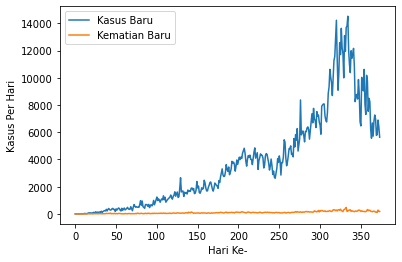

In [18]:
df_ina['new_cases'].plot(label='Kasus Baru')
df_ina['new_deaths'].plot(label='Kematian Baru')
plt.xlabel('Hari Ke-')
plt.ylabel('Kasus Per Hari')
plt.legend(loc='best')
plt.show()

In [19]:
for i in range (len(df_ina)):
    if df_ina['new_cases'].iloc[i]==df_ina['new_cases'].max():
        print("Tanggal kasus positif tertinggi {}".format(df_ina['date'].iloc[i]))
        print("Dengan jumlah {}".format(df_ina['new_cases'].iloc[i]))
        break

Tanggal kasus positif tertinggi 2021-01-30
Dengan jumlah 14518.0


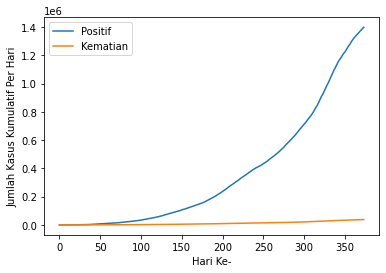

In [20]:
df_ina['total_cases'].plot(label='Positif')
df_ina['total_deaths'].plot(label='Kematian')
plt.xlabel('Hari Ke-')
plt.ylabel('Jumlah Kasus Kumulatif Per Hari')
plt.legend(loc='best')
plt.show()

## Model Prediksi

original sigmoid
$$ sig(t)=\frac(1)(1+e^(-t)) $$
Modifikasi
$$ sig_m(t)=\frac(c)(1+e^(-(t-t_0)/a)) $$

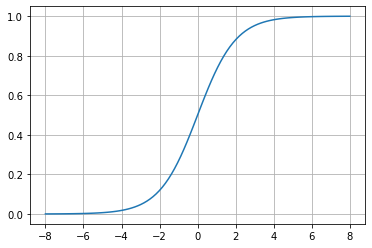

In [23]:
puncak=1
x=np.linspace(-8,8,100)
y=puncak/(1+np.exp(-x))
plt.plot(x,y, label='Sigmoid')
plt.grid()
plt.show()

In [27]:
def kurva_sigmoid(t,a,t0,c):
    return c/(1+np.exp(-(t-t0)/(a)))

In [28]:
x=list(df_ina.index)
y=list(df_ina['total_cases'])

In [29]:
from scipy.optimize import curve_fit, fsolve

In [31]:
fit=curve_fit(kurva_sigmoid,x,y, method='trf')
varA, varB=fit

In [32]:
varA

array([6.91351215e+01, 3.71791297e+02, 2.84764134e+06])

In [33]:
varB

array([[5.78362386e-01, 2.65325669e+00, 5.86840997e+04],
       [2.65325669e+00, 1.35937696e+01, 3.06840749e+05],
       [5.86840997e+04, 3.06840749e+05, 6.98120120e+09]])

In [34]:
std_er=np.zeros(len(varA))
for i in range(len(varA)):
    std_er[i]=np.sqrt(varB[i][i])

In [35]:
std_er

array([7.60501404e-01, 3.68697295e+00, 8.35535828e+04])

In [36]:
a=varA[0]+std_er[0]
t0=varA[1]+std_er[1]
c=varA[2]+std_er[2]

In [37]:
def puncak(x):
    return kurva_sigmoid(x,a,t0,c)-int(c)

In [38]:
n_puncak=int(fsolve(puncak,t0))

In [39]:
print('Hari puncak wabah covid-19 adalah hari ke-'+str(n_puncak))

Hari puncak wabah covid-19 adalah hari ke-1422


### Analisis

In [40]:
n_0=max(x)+1
pred_x=list(range(n_0,n_puncak))

In [41]:
print("Kita memiliki {} hari menuju puncak wabah".format(str(len(pred_x))))

Kita memiliki 1048 hari menuju puncak wabah


In [42]:
pred_y=np.zeros(len(x+pred_x))
for i in range (n_puncak):
    pred_y[i]=kurva_sigmoid(i,a,t0,c)

In [43]:
print("Prediksi jumlah puncak {} orang".format(int(pred_y[-1])))

Prediksi jumlah puncak 2931193 orang


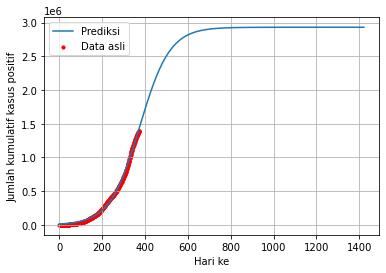

In [45]:
plt.plot(x+pred_x, pred_y, label='Prediksi')
plt.scatter(x,y, label='Data asli', s=10, color='red')
plt.xlabel('Hari ke')
plt.ylabel('Jumlah kumulatif kasus positif')
plt.grid()
plt.legend(loc='best')
plt.show()

## Akurasi

## R2 Skor
$$ R^2=1-\frac(S_(res))(S_(tot))$$
$$ R^2= 1-\frac(\Sigma(y_i-\hat(y_i))^2)(\Sigma(y_i-\bar(y))^2)$$

In [46]:
def akurasi_r2(y_asli, y_prediksi, x):
    atas=sum((y_asli-y_prediksi[0:len(x)])**2)
    bawah=sum((y_asli-np.mean(y))**2)
    r=1-(atas/bawah)
    return r

In [47]:
akur=akurasi_r2(y,pred_y,x)

In [48]:
akur*100

99.74351961376519

In [49]:
from datetime import datetime, timedelta

In [51]:
df_ina

,date,total_cases,new_cases,total_deaths,new_deaths
0,2020-03-02,2.0,2.0,0.0,0.0
1,2020-03-03,2.0,0.0,0.0,0.0
2,2020-03-04,2.0,0.0,0.0,0.0
3,2020-03-05,2.0,0.0,0.0,0.0
4,2020-03-06,4.0,2.0,0.0,0.0
...,...,...,...,...,...
369,2021-03-06,1373836.0,5767.0,37154.0,128.0
370,2021-03-07,1379662.0,5826.0,37266.0,112.0
371,2021-03-08,1386556.0,6894.0,37547.0,281.0
372,2021-03-09,1392945.0,6389.0,37757.0,210.0


In [52]:
fmt='%Y-%m-%d'
n1=df_ina['date'][0]
tgl_0=datetime.strptime(n1,fmt)
print(tgl_0)

2020-03-02 00:00:00


In [54]:
type(tgl_0),  type(df_ina['date'][0])

(datetime.datetime, str)

In [55]:
tgl_puncak=tgl_0+timedelta(days=n_puncak)
print(tgl_puncak)

2024-01-23 00:00:00


In [56]:
tgl_0+timedelta(days=n_puncak/2)

datetime.datetime(2022, 2, 11, 0, 0)

In [57]:
h_puncak=tgl_puncak.strftime(fmt)

In [58]:
h_puncak

'2024-01-23'

In [59]:
type(h_puncak)

str

In [60]:
df_ina

,date,total_cases,new_cases,total_deaths,new_deaths
0,2020-03-02,2.0,2.0,0.0,0.0
1,2020-03-03,2.0,0.0,0.0,0.0
2,2020-03-04,2.0,0.0,0.0,0.0
3,2020-03-05,2.0,0.0,0.0,0.0
4,2020-03-06,4.0,2.0,0.0,0.0
...,...,...,...,...,...
369,2021-03-06,1373836.0,5767.0,37154.0,128.0
370,2021-03-07,1379662.0,5826.0,37266.0,112.0
371,2021-03-08,1386556.0,6894.0,37547.0,281.0
372,2021-03-09,1392945.0,6389.0,37757.0,210.0


In [61]:
df_ina['total_pred']=pred_y[0:len(x)].astype(int)
df_ina['Selisih']=abs(df_ina['total_pred']-df_ina['total_cases'])

In [62]:
df_ina

,date,total_cases,new_cases,total_deaths,new_deaths,total_pred,Selisih
0,2020-03-02,2.0,2.0,0.0,0.0,13552,13550.0
1,2020-03-03,2.0,0.0,0.0,0.0,13746,13744.0
2,2020-03-04,2.0,0.0,0.0,0.0,13943,13941.0
3,2020-03-05,2.0,0.0,0.0,0.0,14143,14141.0
4,2020-03-06,4.0,2.0,0.0,0.0,14346,14342.0
...,...,...,...,...,...,...,...
369,2021-03-06,1373836.0,5767.0,37154.0,128.0,1397726,23890.0
370,2021-03-07,1379662.0,5826.0,37266.0,112.0,1408191,28529.0
371,2021-03-08,1386556.0,6894.0,37547.0,281.0,1418662,32106.0
372,2021-03-09,1392945.0,6389.0,37757.0,210.0,1429138,36193.0


In [63]:
df_ina=df_ina[['date','new_cases','total_deaths','new_deaths','total_cases','total_pred','Selisih']]

In [64]:
df_ina

,date,new_cases,total_deaths,new_deaths,total_cases,total_pred,Selisih
0,2020-03-02,2.0,0.0,0.0,2.0,13552,13550.0
1,2020-03-03,0.0,0.0,0.0,2.0,13746,13744.0
2,2020-03-04,0.0,0.0,0.0,2.0,13943,13941.0
3,2020-03-05,0.0,0.0,0.0,2.0,14143,14141.0
4,2020-03-06,2.0,0.0,0.0,4.0,14346,14342.0
...,...,...,...,...,...,...,...
369,2021-03-06,5767.0,37154.0,128.0,1373836.0,1397726,23890.0
370,2021-03-07,5826.0,37266.0,112.0,1379662.0,1408191,28529.0
371,2021-03-08,6894.0,37547.0,281.0,1386556.0,1418662,32106.0
372,2021-03-09,6389.0,37757.0,210.0,1392945.0,1429138,36193.0


In [66]:
df_ina.tail(20)

,date,new_cases,total_deaths,new_deaths,total_cases,total_pred,Selisih
354,2021-02-19,10614.0,34152.0,183.0,1263299.0,1242170,21129.0
355,2021-02-20,8054.0,34316.0,164.0,1271353.0,1252422,18931.0
356,2021-02-21,7300.0,34489.0,173.0,1278653.0,1262695,15958.0
357,2021-02-22,10180.0,34691.0,202.0,1288833.0,1272988,15845.0
358,2021-02-23,9775.0,35014.0,323.0,1298608.0,1283300,15308.0
359,2021-02-24,7533.0,35254.0,240.0,1306141.0,1293631,12510.0
360,2021-02-25,8493.0,35518.0,264.0,1314634.0,1303980,10654.0
361,2021-02-26,8232.0,35786.0,268.0,1322866.0,1314345,8521.0
362,2021-02-27,6208.0,35981.0,195.0,1329074.0,1324725,4349.0
363,2021-02-28,5560.0,36166.0,185.0,1334634.0,1335119,485.0


## Visualisasi Data Prediksi

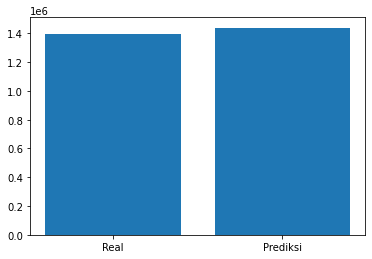

In [67]:
label=['Real','Prediksi']
value=[df_ina['total_cases'].iloc[-1],
    df_ina['total_pred'].iloc[-1]]
plt.bar(label,value)
plt.show()

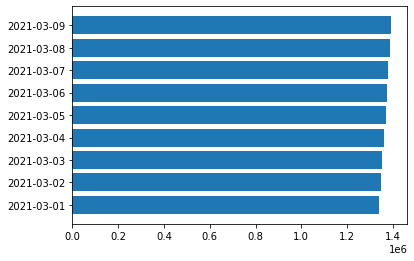

In [69]:
label=np.array(df_ina['date'].iloc[-10:-1], dtype=str)
value=np.array(df_ina['total_cases'].iloc[-10:-1], dtype=int)
plt.barh(label,value)
plt.show()